In [1]:
!unzip corpora.zip

Archive:  corpora.zip
  inflating: AnnaKarenina.txt        
  inflating: WarAndPeace.txt         
  inflating: WarAndPeaceEng.txt      


In [1]:
import numpy as np
from random import sample, random
from collections import Counter
from nltk import ngrams
from tqdm import tqdm

In [2]:
import re
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep

In [3]:
trans_table = str.maketrans('', '', '.,!?\'-–—…[]\n;:«»0123456789`')

train_text = None
with open("./WarAndPeace.txt", 'r') as file:
    train_text = ' '.join(re.sub('[^а-яА-Я ]', ' ', file.read().lower()).split())
    
test_text = None
with open("./AnnaKarenina.txt", 'r') as file:
    test_text = ' '.join(re.sub('[^а-яА-Я ]', ' ', file.read().lower()).split())

## Базовый частотный метод

Для начала организуем несколько функций, которые пригодятся в дальнейшем.

In [4]:
def build_counter(text, n_gram=1):
    return Counter(
        map(
            lambda x: ''.join(x),
            ngrams(text, n_gram)
        )
    )

def reconstruct_text(text: str, base_text: str, n_gram: int = 1):
    cntr_text = build_counter(text, n_gram=n_gram)
    cntr_base = build_counter(base_text, n_gram=n_gram)
    base_top_keys = list(map(lambda x: x[0], cntr_base.most_common()))
    text_top_keys = list(map(lambda x: x[0], cntr_text.most_common()))

    replace_dict = {from_: to_ for from_, to_ in zip(text_top_keys, base_top_keys)}
    reconstructed_text_lst = []
    for idx_begin, idx_end in zip(range(0, len(text), n_gram), range(n_gram, len(text), n_gram)):
        for ngram_shift in range(n_gram):
            reconstructed_text_lst.append(replace_dict.get(text[idx_begin + ngram_shift:idx_end + ngram_shift], ' ' * n_gram))
    
    reconstructed_text = ''.join(reconstructed_text_lst)[::n_gram]
    
    return reconstructed_text

In [5]:
cntr_train = Counter(train_text)
cntr_test = Counter(test_text)

In [6]:
list(zip(cntr_train.most_common(50), cntr_test.most_common(50)))

[((' ', 104466), (' ', 283520)),
 (('о', 61282), ('о', 162409)),
 (('а', 45209), ('е', 123650)),
 (('е', 42519), ('а', 117104)),
 (('и', 35838), ('н', 98139)),
 (('н', 35119), ('и', 93874)),
 (('т', 30619), ('т', 84639)),
 (('с', 28128), ('с', 75124)),
 (('л', 27277), ('л', 70914)),
 (('в', 24824), ('в', 66562)),
 (('р', 24570), ('р', 56289)),
 (('к', 19328), ('к', 48460)),
 (('д', 16387), ('д', 41632)),
 (('м', 15940), ('м', 40527)),
 (('у', 15454), ('у', 38129)),
 (('п', 13847), ('п', 34093)),
 (('я', 12477), ('я', 30444)),
 (('г', 11177), ('ь', 27853)),
 (('ь', 10498), ('ы', 26214)),
 (('ы', 10233), ('г', 25693)),
 (('з', 9602), ('б', 24718)),
 (('б', 9310), ('ч', 23858)),
 (('ч', 7349), ('з', 23121)),
 (('й', 6210), ('ж', 16020)),
 (('ж', 5460), ('й', 14862)),
 (('ш', 5090), ('ш', 12068)),
 (('х', 4600), ('х', 10986)),
 (('ю', 3495), ('ю', 8812)),
 (('ц', 2179), ('э', 5019)),
 (('э', 1629), ('щ', 4054)),
 (('щ', 1514), ('ц', 3993)),
 (('ф', 1209), ('ф', 1781)),
 (('ъ', 283), ('ъ', 

Видим, что распределения таки отличаются, поэтому ожидаемо, что на буквенном уровне результаты будут не очень. Однако мы всё ещё можем рассчитывать на то, что смысл предложений будет понятен. Проверим это.

In [7]:
rand_perm = {
    chr(ord('а') + i) : chr(ord('а') + num)
    for i, num in enumerate(sample(range(ord('я') - ord('а') + 1), k=ord('я') - ord('а') + 1))
}

permuted_text = test_text.translate(str.maketrans(rand_perm))

In [8]:
test_text[:10000]

'анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский нахо

In [9]:
reconstruct_text(permuted_text, train_text, n_gram=1)[:10000]

'еиие кераиние одни нч семьх чиемаинтьх ромеиов лгве толстоыо иебниеатся стевшаж ефорнчмом фречож вса сбестлнвьа самгн похойн друы ие друые кейдея иасбестлнвея самгя иасбестлнве по своаму цто киные о вабиьх щаииостях о люзвн о вара о самга о баловабаском достониства лав толстожромеи шнрокоыо дьхеиня бестг парвея лав толстож еиие кераиние ромеи шнрокоыо дьхеиня еиие кераиние поречнле соврамаиинков всадиавиостгю содарйеиня иаозьбежиея свозоде ресковеииостг поваствовеиня уднвнталгио собателнсг в цтом ромеиа с щалгиостгю худойастваииоыо вчыляде евторе ие йнчиг ои вьступел чдасг кек худойинк н мьслнталг н иечиебаина нскусстве вндал иа в том бтозь иаоспорнмо речрашнтг вопрос е в том бтозь честевнтг люзнтг йнчиг в засбнслаииьх инкоыде иа нстоэнмьх всах аа проявлаинях в а ыодь одни местнтьж пнсеталг по внднмому ыоиберов скечел достоавскому цто ваэг иасльхеииея цто ваэг парвея кто у иес нч пнсеталаж мойат поревиятгся с цтнм е в авропа кто прадстевнт хотг бто инзудг подозиоа ф м достоавскнж иехо

In [10]:
reconstruct_text(permuted_text[:1000000], train_text, n_gram=2)[:10000]

' в анлы  йо а втовясн сисяджо ис йлуядеоои ар аебпар рос ано  лло ыахр  скормамирсвнссио ыцн шхм тыи укюсг с уи ыбждеткушбзев беа  ав беуанлбвдк  ндукюсг спк  ыбжо  ндукюсг спатко ле баонн онпйвуа о  уычядип валсддд оажпате о  а и о ыбжыи оувлор увдтоо велс гобсм иаре р рос хцоои вокчотоановфяв йо укюсоьтдаипк аре р рос хми в анлы  йо аеоои вокчотоановфяв йо и в анлы  йо атквн стка хрщ бс вйиор  тыпинеаалсоич хвоаши йо  ннсажкаб к  лесшвдаенюторп валсоьткр дсмерп йо сдтстлилепао хявакг тиь  нн о еоои ни  иплепалсоичгсдеблдсм  ваано руосудаиоъ вна  аазсожь пв  аслдиг жоодиьнлесгсдебцйисяеесас лилеьяе   о лв йеияттыозсмпа тыол  ни  р о уо саа ннлдквнииоен р нклоь емлол иа  р о уо саажтюскотлоьажпялоьазсожь  еудултср вчяд йиоалда ниятс збисяд тыудзаитломя р йодд  зиннвфа втовеиюсмлуемтртс илеьтко тытииоаоннп кыор  тл тг велс  еттооаонн о  щяь ндсуяв в к нн о  щяьтдаипк нщ осо  ю яснтртс илрамеибладтквноаироыр   ннми иа  зещомдинщ отл пьскотлдгшооьуо о йюьдоьтквесьа иыге велс  етттим  ашв

Что ж, биграммы выдают совсем бредовую расшифровку...

## MCMC

Будем придерживаться следующего алгоритма:

Пусть у нас есть набор биграмм и соответствующих им количеств вхождений в датасете (можно сказать, есть словарь (биграмма, кол-во вхождений)), а также количество их вхождений в трейн датасете (словарь такой же формы). Будем обучать (изменять) ключи словаре для датасета, который хотим расшифровать. Псевдокод выглядит следующим образом:

```
iter_nums := ITER_NUMS

for iter in iter_nums:
    swap 2 random characters for deciphering
    reconstruct the text with given decipher dictionary
    calculate new likelihood based on bigram statistics
    if new_likelihood / likelihood > x (~ Uniform([0, 1])):
        save this swap
    else:
        revert swap

```

Сама же функция правдоподобия будет считаться следующим образом:

$$
L(D | \theta) = \prod_i p(x_i | \theta) = \prod_j p(x_j) ^ {| \{x_j \in D\} |}
$$

Где $p(x_i)$ - вероятность появления (из трейн датасета), $D$ - набор биграм на датасете, на котором считаются правдоподобия.

Заметим, что нам на самом деле не нужно считать вероятности - нормировочный коэффициент сокращается, когда мы рассматриваем отношение.

Также отметим, что считать мы будем логарифмы (правдоподобий и логарифм случайно отсемплированного числа).

In [12]:
permuted_text = permuted_text[:100000]

In [72]:
def train_mcmc(
    train_text,
    permuted_text,
    test_text=None,
    cnt_train=None,
    n_grams=2,
    num_iters=3000,
    print_every=5000,
    return_best=False,
    output_metrics=False
):
    cnt_train = Counter(map(
        lambda x: ''.join(x),
        ngrams(train_text, n_grams)
    ))
    
    mapping = dict(zip(
        map(lambda x: x[0], Counter(permuted_text).most_common()),
        map(lambda x: x[0], Counter(train_text).most_common())
    ))

    max_ll = 0.
    log_likelihoods = [0.]
    
    if output_metrics:
        assert test_text is not None, "Provide test text to count accuracy."
        accuracies = [0.]
    
    reconstructed_text = ''.join([mapping[character] for character in permuted_text])

    if return_best:
        best_ll = 0.
        best_mapping = mapping.copy()
        best_rec = reconstructed_text

    for iter_ in tqdm(range(num_iters)):
        replace_keys = np.random.choice(list(mapping.keys()), size=2, replace=False)

        mapping_changes = {
            mapping[replace_keys[0]]: mapping[replace_keys[1]],
            mapping[replace_keys[1]]: mapping[replace_keys[0]]
        }
        reconstructed_text = reconstructed_text.translate(str.maketrans(mapping_changes))

        cnt_cipher = Counter(map(
                lambda x: ''.join(x),
                ngrams(reconstructed_text, n_grams)
        ))

        log_likelihood_unnormed = 0.
        for key in cnt_cipher:
            log_likelihood_unnormed += cnt_cipher[key] * np.log(cnt_train.get(key, 1))

        log_likelihoods.append(log_likelihood_unnormed)

        if output_metrics:
            accuracy = 0
            for i in range(len(test_text)):
                accuracy += test_text[i] == reconstructed_text[i]
            accuracy /= len(test_text)
            accuracies.append(accuracy)
        
        if np.log(random()) > log_likelihood_unnormed - max_ll:
            reconstructed_text = reconstructed_text.translate(str.maketrans(mapping_changes))        
        else:
            mapping[replace_keys[0]], mapping[replace_keys[1]] = mapping[replace_keys[1]], mapping[replace_keys[0]]
            max_ll = log_likelihood_unnormed
            
            if return_best and max_ll > best_ll:
                best_ll = max_ll
                best_mapping = mapping.copy()
                best_rec = reconstructed_text
                

        if iter_ % print_every == 0:
            
            print(reconstructed_text[:1000])

    if return_best:
        if output_metrics:
            return accuracies, best_mapping, best_rec
        return log_likelihoods, best_mapping, best_rec
    if output_metrics:
        return accuracies, mapping, reconstructed_text
    return log_likelihoods, mapping, reconstructed_text

In [46]:
text_size = 10000
log_likelihoods, mapping, reconstructed_text = train_mcmc(train_text, permuted_text[:text_size], num_iters=5000)
print(reconstructed_text[:1000])

  2%|█▋                                                                             | 109/5000 [00:00<00:13, 356.49it/s]

неен кнваеиен тмие иь ондпж ьендаеиспж втднетл рйлн стростзт енчиенасоы оснлцаг нфтвиьдтд фвньтг лоа очносрилпа оадйи ятжтши мвуз ен мвузн кншмны еаочносрилны оадйы еаочносрилн ят олтаду эст кеизн т лачепж хаеетосыж т рюбли т лава т оадйа т чартлачаоктд мтостиеосла рал стростгвтдне цивтктзт мпжнеиы чносй яавлны рал стростг неен кнваеиен втдне цивтктзт мпжнеиы неен кнваеиен ятвньирн отлвадаееиктл лоамеалетосйю отмавшнеиы еатбпчнгены олтбтмн вноктлнеетосй ятлаослтлнеиы умилисарйет отчаснриой л эстд втднеа о харйетосйю жумтшаослаеетзт льзрымн нлствн ен шиьей те лпосуянр ьмаой кнк жумтшеик и дпорисарй и еньенчаеиа иокуоослн лимар еа л стд чстбп еатоятвидт вньвацисй лтявто н л стд чстбп ьноснлисй рюбисй шиьей л баочиораеепж еиктзмн еа иостщидпж лоаж аа явтылраеиыж л а зтмп тмие дносиспг яионсарй ят лимидтду зтечнвтл окньнр мтосталоктду эст лащй еаорпжнеены эст лащй яавлны кст у ено иь яионсараг дтшас ятвнлеысйоы о эсид н л алвтяа кст явамоснлис жтсй чст еибумй ятмтбета ф д мтосталокиг енжтм

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:15<00:00, 332.95it/s]

анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский наход

In [47]:
accuracy = 0
for i in range(text_size):
    accuracy += test_text[i] == reconstructed_text[i]
accuracy /= text_size
accuracy

1.0

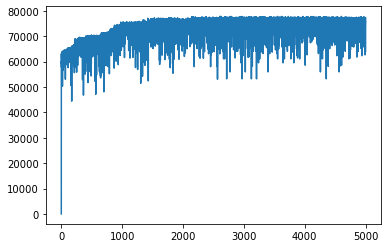

In [48]:
plt.plot(log_likelihoods)

## Расшифровка

Выглядит очень неплохо!

In [49]:
ciphered_text = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

In [50]:
ciphered_text

'←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'

In [62]:
log_likelihoods, mapping, reconstructed_text = train_mcmc(
    train_text,
    ciphered_text,
    num_iters=300000,
    print_every=50000,
    n_grams=2,
    return_best=True
)
print(reconstructed_text[:1000])

  0%|▏                                                                           | 980/300000 [00:00<01:01, 4823.97it/s]

олие рд репесо навгтиундь еие яамсе навгтиундь соклс з шсаыа лаабйонеч касавдь иоыка яваместсу лкавоо рлоыа рд рло лпоитие явтреиуна е яаизмесо гтклегтиундь бтии жт яалиопноо мосровсао жтптнео кзвлт хасч каномна ч немоыа но абойтю


 17%|████████████▌                                                             | 50679/300000 [00:10<00:52, 4792.94it/s]

ерли пы пижисе новзальный или томси новзальный секрс у юсого роодшения косовый легко твомисась рковее прего пы пре ржелали твапильно и толумисе закризальный далл ча торлежнее меспевсое чажание кувра бося конемно я нимего не одешах


 34%|████████████████████████▌                                                | 100828/300000 [00:21<00:41, 4839.42it/s]

ерти бы бидиле носкатьный ити вомли носкатьный лепрл у шлого роожчения полосый тегпо всомилаль рпосее брего бы бре рдетати всабитьно и вотумиле каприкатьный жатт за вортеднее мелбеслое задание пусра холя понемно я нимего не ожечаю


 50%|████████████████████████████████████▋                                    | 150833/300000 [00:31<00:30, 4853.32it/s]

если вы вимите нордальный или почти нордальный текст у штого сообжения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный балл за послемнее четвертое замание курса хотя конечно я ничего не обежаю


 67%|████████████████████████████████████████████████▊                        | 200660/300000 [00:42<00:21, 4601.80it/s]

если вы вимите норзальный или подти норзальный текст у ютого соожбения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный жалл ча послемнее детвертое чамание курса шотя конедно я нидего не ожебах


 84%|█████████████████████████████████████████████████████████████            | 250814/300000 [00:52<00:10, 4724.46it/s]

если вы вимите норжальный или подти норжальный текст у чтого сообшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обешаю


100%|█████████████████████████████████████████████████████████████████████████| 300000/300000 [01:03<00:00, 4726.03it/s]

если вы вимите норжальный или подти норжальный текст у чтого сообшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обешаю


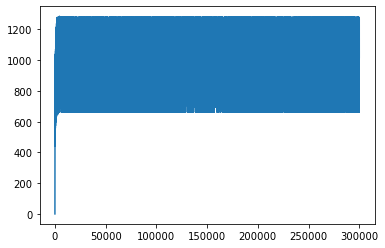

In [59]:
plt.plot(log_likelihoods)

In [63]:
ciphered_text = "დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ"

In [64]:
ciphered_text

'დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ'

In [65]:
log_likelihoods, mapping, reconstructed_text = train_mcmc(
    train_text,
    ciphered_text,
    num_iters=300000,
    print_every=50000,
    n_grams=2,
    return_best=True
)
print(reconstructed_text[:1000])

  0%|▏                                                                           | 966/300000 [00:00<01:01, 4838.95it/s]

олиедр дреяесоднавгтиун ьдеиедпамседнавгтиун ьдсоклсдздшсаыадлаабйонечдкасав ьдиоыкадпваместсудлкавоодрлоыадр дрлодляоитиедпвтреиунадедпаизмесодгтклегтиун ьдбтииджтдпалиояноодмосровсаоджтятнеодкзвлтдхасчдканомнадчднемоыаднодабойтю


 17%|████████████▍                                                             | 50650/300000 [00:10<00:52, 4738.50it/s]

если вы вимите норжальный или подти норжальный текст у чтого сообшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обешаю


 34%|████████████████████████▌                                                | 101046/300000 [00:21<00:41, 4755.93it/s]

если вы вимите норзальный или подти норзальный текст у штого сообжения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный балл ча послемнее детвертое чамание курса хотя конедно я нидего не обежаю


 50%|████████████████████████████████████▋                                    | 150658/300000 [00:32<00:31, 4709.10it/s]

если вы вимите норжальный или подти норжальный текст у бтого соочшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный чалл за послемнее детвертое замание курса хотя конедно я нидего не очешаю


 67%|████████████████████████████████████████████████▊                        | 200723/300000 [00:43<00:21, 4599.42it/s]

если вы видите норзальный или помти норзальный текст у чтого соошжения который легко промитать скорее всего вы все сделали правильно и полумите заксизальный шалл ба последнее метвертое бадание курса хотя конемно я нимего не ошежаю


 84%|█████████████████████████████████████████████████████████████            | 250788/300000 [00:54<00:10, 4813.98it/s]

если вы вимите норжальный или подти норжальный текст у чтого сообшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обешаю


100%|█████████████████████████████████████████████████████████████████████████| 300000/300000 [01:04<00:00, 4627.40it/s]

если вы вимите норжальный или подти норжальный текст у чтого сообшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обешаю


## Немного экспериментов

In [82]:
ngrams_lst = [3, 4, 5, 10, 15, 20]

accuracies_dct = {ngram: None for ngram in ngrams_lst}

for ngram in ngrams_lst:
    accuracies_quad, mapping, reconstructed_text = train_mcmc(
        train_text,
        permuted_text[:10000],
        test_text=test_text[:10000],
        num_iters=5000,
        print_every=1000,
        n_grams=ngram,
        return_best=True,
        output_metrics=True
    )
    
    accuracies_dct[ngram] = accuracies_quad

  1%|▌                                                                               | 37/5000 [00:00<00:27, 180.22it/s]

неен кнваеиен омие иь тндпж ьендаеиспж воднеою рйюн сортсозо енчиенасты тснюцаг нфовиьдод фвньог юта тчнтсриюпа тадйи яожоши мвуз ен мвузн кншмны еатчнтсриюны тадйы еатчнтсриюн яо тюоаду эсо кеизн о юачепж хаееотсыж о рлбюи о юава о тадйа о чароюачаткод мотсоиетсюа раю сортсогводне цивокозо мпжнеиы чнтсй яавюны раю сортсог неен кнваеиен водне цивокозо мпжнеиы неен кнваеиен яовньирн тоювадаееикою ютамеаюеотсйл томавшнеиы еаобпчнгены тюобомн внткоюнееотсй яоюатсюоюнеиы умиюисарйео точаснритй ю эсод воднеа т харйеотсйл жумошатсюаееозо юьзрымн нюсовн ен шиьей ое юптсуянр ьматй кнк жумошеик и дптрисарй и еньенчаеиа иткуттсюн юимар еа ю сод чсобп еаотяовидо вньвацисй юоявот н ю сод чсобп ьнтснюисй рлбисй шиьей ю батчитраеепж еикозмн еа итсощидпж ютаж аа явоыюраеиыж ю а зомп омие днтсиспг яитнсарй яо юимидоду зоечнвою ткньнр мотсоаюткоду эсо юащй еатрпжнеены эсо юащй яавюны ксо у ент иь яитнсараг дошас яовнюеысйты т эсид н ю аювояа ксо явамтснюис жосй чсо еибумй яомобеоа ф д мотсоаюткиг енжом

 21%|████████████████                                                              | 1026/5000 [00:06<00:24, 163.85it/s]

анна каренина ошин из садюх знаденитюх роданов льва толстого начинается ставмей афориздод фразой все счастливюе седьи похожи шруг на шруга кажшая несчастливая седья несчастлива по своеду это книга о вечнюх ценностях о лщбви о вере о седье о человеческод шостоинстве лев толстойродан мирокого шюхания часть первая лев толстой анна каренина родан мирокого шюхания анна каренина поразила совреденников всешневностьщ сошержания необючайная свобоша раскованность повествования ушивительно сочетались в этод родане с цельностьщ хушожественного взгляша автора на жизнь он вюступал зшесь как хушожник и дюслитель и назначение искусства вишел не в тод чтобю неоспоридо разремить вопрос а в тод чтобю заставить лщбить жизнь в бесчисленнюх никогша не истоыидюх всех ее проявлениях в е гошю ошин даститюй писатель по вишидоду гончаров сказал шостоевскоду это веыь неслюханная это веыь первая кто у нас из писателей дожет поравняться с этид а в европе кто прешставит хоть что нибушь пошобное ф д шостоевский нахош

 41%|███████████████████████████████▋                                              | 2032/5000 [00:12<00:17, 173.40it/s]

анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский наход

 61%|███████████████████████████████████████████████▎                              | 3033/5000 [00:18<00:11, 164.14it/s]

анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский наход

 80%|██████████████████████████████████████████████████████████████▊               | 4024/5000 [00:24<00:05, 171.50it/s]

анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский наход

  0%|▍                                                                               | 25/5000 [00:00<00:41, 120.64it/s]

неен кнваеиен омие иь тндпж ьендаеиспж воднеол рйлн сортсозо енчиенасты тснлцаг нфовиьдод фвньог лта тчнтсрилпа тадйи яожоюи мвуз ен мвузн кнюмны еатчнтсрилны тадйы еатчнтсрилн яо тлоаду эсо кеизн о лачепж хаееотсыж о ршбли о лава о тадйа о чаролачаткод мотсоиетсла рал сортсогводне цивокозо мпжнеиы чнтсй яавлны рал сортсог неен кнваеиен водне цивокозо мпжнеиы неен кнваеиен яовньирн толвадаееикол лтамеалеотсйш томавюнеиы еаобпчнгены тлобомн внтколнееотсй яолатслолнеиы умилисарйео точаснритй л эсод воднеа т харйеотсйш жумоюатслаееозо льзрымн нлсовн ен юиьей ое лптсуянр ьматй кнк жумоюеик и дптрисарй и еньенчаеиа иткуттслн лимар еа л сод чсобп еаотяовидо вньвацисй лоявот н л сод чсобп ьнтснлисй ршбисй юиьей л батчитраеепж еикозмн еа итсощидпж лтаж аа явоылраеиыж л а зомп омие днтсиспг яитнсарй яо лимидоду зоечнвол ткньнр мотсоалткоду эсо лащй еатрпжнеены эсо лащй яавлны ксо у ент иь яитнсараг доюас яовнлеысйты т эсид н л алвояа ксо явамтснлис жосй чсо еибумй яомобеоа ф д мотсоалткиг енжом

 20%|███████████████▊                                                              | 1015/5000 [00:08<00:32, 120.99it/s]

анна каренина один из салых зналенитых роланов мьва томстого начинается ставшей афоризлол фразой все счастмивые сельи похожи друг на друга каждая несчастмивая селья несчастмива по своелу это книга о вечных ценностях о мюбви о вере о селье о чемовеческол достоинстве мев томстойролан широкого дыхания часть первая мев томстой анна каренина ролан широкого дыхания анна каренина поразима совреленников вседневностью содержания необычайная свобода раскованность повествования удивитемьно сочетамись в этол ролане с цемьностью художественного взгмяда автора на жизнь он выступам здесь как художник и лысмитемь и назначение искусства видем не в тол чтобы неоспорило разрешить вопрос а в тол чтобы заставить мюбить жизнь в бесчисменных никогда не истощилых всех ее проявмениях в е годы один ластитый писатемь по видилолу гончаров сказам достоевсколу это вещь несмыханная это вещь первая кто у нас из писатемей ложет поравняться с этил а в европе кто представит хоть что нибудь подобное ф л достоевский наход

 40%|███████████████████████████████▌                                              | 2022/5000 [00:17<00:25, 117.19it/s]

анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский наход

 61%|███████████████████████████████████████████████▏                              | 3026/5000 [00:26<00:16, 121.13it/s]

анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский наход

 80%|██████████████████████████████████████████████████████████████▋               | 4016/5000 [00:34<00:08, 116.60it/s]

анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский наход

  0%|▏                                                                                | 10/5000 [00:00<00:52, 94.50it/s]

неен кнваеиен омие иь тндпж ьендаеиспж воднеол рйлн сортсозо енчиенасты тснлцаг нфовиьдод фвньог лта тчнтсрилпа тадйи яожоши мвуз ен мвузн кншмны еатчнтсрилны тадйы еатчнтсрилн яо тлоаду бсо кеизн о лачепж хаееотсыж о рюэли о лава о тадйа о чаролачаткод мотсоиетсла рал сортсогводне цивокозо мпжнеиы чнтсй яавлны рал сортсог неен кнваеиен водне цивокозо мпжнеиы неен кнваеиен яовньирн толвадаееикол лтамеалеотсйю томавшнеиы еаоэпчнгены тлоэомн внтколнееотсй яолатслолнеиы умилисарйео точаснритй л бсод воднеа т харйеотсйю жумошатслаееозо льзрымн нлсовн ен шиьей ое лптсуянр ьматй кнк жумошеик и дптрисарй и еньенчаеиа иткуттслн лимар еа л сод чсоэп еаотяовидо вньвацисй лоявот н л сод чсоэп ьнтснлисй рюэисй шиьей л эатчитраеепж еикозмн еа итсощидпж лтаж аа явоылраеиыж л а зомп омие днтсиспг яитнсарй яо лимидоду зоечнвол ткньнр мотсоалткоду бсо лащй еатрпжнеены бсо лащй яавлны ксо у ент иь яитнсараг дошас яовнлеысйты т бсид н л алвояа ксо явамтснлис жосй чсо еиэумй яомоэеоа ф д мотсоалткиг енжом

 20%|████████████████                                                               | 1017/5000 [00:11<00:43, 90.59it/s]

анна паренина ошин из самьх знаменитьх романов лыва толстоко надинается ставчей афоризмом фразой все сдастливье семыи гохожи шрук на шрука пажшая несдастливая семыя несдастлива го своему это пника о ведньх ценностях о любви о вере о семые о деловедеспом шостоинстве лев толстойроман чиропоко шьхания дасты гервая лев толстой анна паренина роман чиропоко шьхания анна паренина горазила современнипов всешневностыю сошержания необьдайная свобоша распованносты говествования ушивителыно содеталисы в этом романе с целыностыю хушожественноко взкляша автора на жизны он вьстугал зшесы пап хушожнип и мьслителы и назнадение испусства вишел не в том дтобь неосгоримо разречиты вогрос а в том дтобь заставиты любиты жизны в бесдисленньх нипокша не истощимьх всех ее гроявлениях в е кошь ошин маститьй гисателы го вишимому кондаров спазал шостоевспому это вещы несльханная это вещы гервая пто у нас из гисателей может горавнятыся с этим а в евроге пто грешставит хоты дто нибушы гошобное ф м шостоевспий нахош

 40%|███████████████████████████████▊                                               | 2011/5000 [00:22<00:31, 93.57it/s]

анна каренина один из самьх знаменитьх романов лыва толстого начинается ставшей афоризмом фразой все счастливье семыи похожи друг на друга каждая несчастливая семыя несчастлива по своему это книга о вечньх ценностях о любви о вере о семые о человеческом достоинстве лев толстойроман широкого дьхания часты первая лев толстой анна каренина роман широкого дьхания анна каренина поразила современников вседневностыю содержания необьчайная свобода раскованносты повествования удивителыно сочеталисы в этом романе с целыностыю художественного взгляда автора на жизны он вьступал здесы как художник и мьслителы и назначение искусства видел не в том чтобь неоспоримо разрешиты вопрос а в том чтобь заставиты любиты жизны в бесчисленньх никогда не истощимьх всех ее проявлениях в е годь один маститьй писателы по видимому гончаров сказал достоевскому это вещы несльханная это вещы первая кто у нас из писателей может поравнятыся с этим а в европе кто представит хоты что нибуды подобное ф м достоевский наход

 60%|███████████████████████████████████████████████▌                               | 3012/5000 [00:33<00:23, 83.74it/s]

анна каренина один из самьх знаменитьх романов лыва толстого начинается ставшей афоризмом фразой все счастливье семыи похожи друг на друга каждая несчастливая семыя несчастлива по своему это книга о вечньх ценностях о любви о вере о семые о человеческом достоинстве лев толстойроман широкого дьхания часты первая лев толстой анна каренина роман широкого дьхания анна каренина поразила современников вседневностыю содержания необьчайная свобода раскованносты повествования удивителыно сочеталисы в этом романе с целыностыю художественного взгляда автора на жизны он вьступал здесы как художник и мьслителы и назначение искусства видел не в том чтобь неоспоримо разрешиты вопрос а в том чтобь заставиты любиты жизны в бесчисленньх никогда не истощимьх всех ее проявлениях в е годь один маститьй писателы по видимому гончаров сказал достоевскому это вещы несльханная это вещы первая кто у нас из писателей может поравнятыся с этим а в европе кто представит хоты что нибуды подобное ф м достоевский наход

 80%|███████████████████████████████████████████████████████████████▌               | 4020/5000 [00:44<00:10, 90.67it/s]

анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное ф м достоевский наход

  0%|▏                                                                                | 14/5000 [00:00<01:16, 65.29it/s]

нббн кнвабибн омиб иь тндпж ьбндабиспж воднбол рйлн сортсозо бнчибнасты тснлцаг нфовиьдод фвньог лта тчнтсрилпа тадйи яожоши мвуз бн мвузн кншмны батчнтсрилны тадйы батчнтсрилн яо тлоаду эсо кбизн о лачбпж хабботсыж о рюели о лава о тадйа о чаролачаткод мотсоибтсла рал сортсогводнб цивокозо мпжнбиы чнтсй яавлны рал сортсог нббн кнвабибн воднб цивокозо мпжнбиы нббн кнвабибн яовньирн толвадаббикол лтамбалботсйю томавшнбиы баоепчнгбны тлоеомн внтколнбботсй яолатслолнбиы умилисарйбо точаснритй л эсод воднба т харйботсйю жумошатслаббозо льзрымн нлсовн бн шиьбй об лптсуянр ьматй кнк жумошбик и дптрисарй и бньбнчабиа иткуттслн лимар ба л сод чсоеп баотяовидо вньвацисй лоявот н л сод чсоеп ьнтснлисй рюеисй шиьбй л еатчитраббпж бикозмн ба итсощидпж лтаж аа явоылрабиыж л а зомп омиб днтсиспг яитнсарй яо лимидоду зобчнвол ткньнр мотсоалткоду эсо лащй батрпжнббны эсо лащй яавлны ксо у бнт иь яитнсараг дошас яовнлбысйты т эсид н л алвояа ксо явамтснлис жосй чсо биеумй яомоебоа ф д мотсоалткиг бнжом

 20%|███████████████▉                                                               | 1010/5000 [00:14<00:57, 69.99it/s]

рззрешрлсзкзреыцкзекиежр йбеизр сзкнйбелы рзычеэвчреныэжныпыезрфкзрснжяежнрчтсхерьылки ы еьлриыхечжсежфржнэкчйсежс вкеъыбыюкецлапезрецлапрешрюцряезсжфржнэкчряежс вяезсжфржнэкчреъыежчыс аеуныешзкпреыечсфзйбеосззыжнябеыеэмщчкеыечслсеыежс всеыефсэычсфсжшы ецыжныкзжнчсеэсченыэжныхлы рзетклышыпыецйбрзкяефржнвеъслчряеэсченыэжныхерззрешрлсзкзрелы рзетклышыпыецйбрзкяерззрешрлсзкзреъылрикэрежычлс сззкшычечжсцзсчзыжнвмежыцслюрзкяезсыщйфрхзряежчыщыцрелржшычрззыжнвеъычсжнчычрзкяеацкчкнсэвзыежыфснрэкжвечеуны елы рзсежеосэвзыжнвмебацыюсжнчсззыпыечипэяцрерчнылрезреюкизвеызечйжнаърэеицсжвешршебацыюзкшеке йжэкнсэвекезризрфсзксекжшажжнчречкцсэезсечены ефныщйезсыжъылк ыелрилсткнвечыълыжеречены ефныщйеиржнрчкнвеэмщкнвеюкизвечещсжфкжэсззйбезкшыпцрезсекжныгк йбечжсбессеълыячэсзкябечесепыцйеыцкзе ржнкнйхеъкжрнсэвеъыечкцк ы аепызфрлычежшрирэецыжнысчжшы аеуныечсгвезсжэйбрззряеуныечсгвеъслчряешныеаезржекиеъкжрнсэсхе ыюснеъылрчзянвжяежеунк еречесчлыъсешныеълсцжнрчкнебынвефныезкщацвеъыцыщзысеье ецыжнысчжшкхезрбыц

 40%|███████████████████████████████▊                                               | 2011/5000 [00:28<00:41, 71.26it/s]

мйймрпмунйеймрхщейреюрцмгсырюймгнйе сырухгмйхяркэямр хкц хшхрймжеймн цчрц мяднармлхуеюгхгрлумюхаряцнрцжмц кеяснрцнгэертхыхоерщуишрймрщуишмрпмощмчрйнцжмц кеямчрцнгэчрйнцжмц кеямртхрцяхнгирь хрпйешмрхрянжйсырвнййхц чырхркзбяерхрянунрхрцнгэнрхржнкхянжнцпхгрщхц хейц янркняр хкц хаухгмйрдеухпхшхрщсымйечржмц эртнуямчркняр хкц хармйймрпмунйеймрухгмйрдеухпхшхрщсымйечрмйймрпмунйеймртхумюекмрцхяунгнййепхяряцнщйняйхц эзрцхщнуомйечрйнхбсжмаймчрцяхбхщмрумцпхямййхц эртхянц яхямйечрищеяе нкэйхрцхжн мкецэрярь хгрухгмйнрцрвнкэйхц эзрыищхонц янййхшхряюшкчщмрмя хумрймроеюйэрхйрясц итмкрющнцэрпмпрыищхойепрергсцке нкэрерймюймжнйенрецпицц ямряещнкрйнряр хгрж хбсрйнхцтхуегхрумюунде эряхтухцрмряр хгрж хбсрюмц мяе эркзбе эроеюйэрярбнцжецкнййсырйепхшщмрйнрец хфегсыряцнырннртухчякнйечырярнршхщсрхщейргмц е сартецм нкэртхряещегхгиршхйжмухярцпмюмкрщхц хняцпхгирь хрянфэрйнцксымйймчрь хрянфэртнуямчрп хрирймцреюртецм нкнаргхон ртхумяйч эцчрцрь егрмрярняухтнрп хртунщц мяе рых эрж хрйебищэртхщхбйхнрлргрщхц хняцпеарймыхщ

 60%|███████████████████████████████████████████████▌                               | 3009/5000 [00:43<00:28, 68.88it/s]

иууичхищзуауичмшаучаячситбъчяуитзуанбъчщмтиумечйюеичнмйснмдмчуиьауизнспчсниеызгчи мщаятмтч щиямгчесзчсьиснйаебзчсзтюачкмъмлачшщфдчуичшщфдичхилшипчузсьиснйаеипчсзтюпчузсьиснйаеичкмчсемзтфчцнмчхуадичмчезьубъчрзуумснпъчмчйвжеачмчезщзчмчсзтюзчмчьзймезьзсхмтчшмснмауснезчйзечнмйснмгщмтиучыащмхмдмчшбъиуапчьиснючкзщеипчйзечнмйснмгчиууичхищзуауичщмтиучыащмхмдмчшбъиуапчиууичхищзуауичкмщияайичсмещзтзууахмечесзшузеумснювчсмшзщлиуапчузмжбьигуипчсемжмшичщисхмеиуумснючкмезснемеиуапчфшаеанзйюумчсмьзнийасючечцнмтчщмтиузчсчрзйюумснювчъфшмлзснезуумдмчеядйпшичиенмщичуичлаяуючмучебснфкийчяшзсючхихчъфшмлуахчачтбсйанзйючачуияуиьзуазчасхфсснеичеашзйчузчечнмтчьнмжбчузмскмщатмчщиящзыанючемкщмсчичечнмтчьнмжбчяисниеанючйвжанючлаяуючечжзсьасйзуубъчуахмдшичузчаснмоатбъчесзъчззчкщмпейзуапъчечзчдмшбчмшаучтиснанбгчкасинзйючкмчеашатмтфчдмуьищмечсхияийчшмснмзесхмтфчцнмчезоючузсйбъиууипчцнмчезоючкзщеипчхнмчфчуисчаячкасинзйзгчтмлзнчкмщиеупнюспчсчцнатчичечзещмкзчхнмчкщзшсниеанчъмнючьнмчуажфшючкмшмжумзч чтчшмснмзесхагчуиъмш

 80%|███████████████████████████████████████████████████████████████▎               | 4007/5000 [00:58<00:14, 67.95it/s]

рююрнарщпюуюрнжсуюнуен рьдхнеюрьпюубдхнщжьрюжонтйорнбжт бжцжнюркуюрпб лн брочпянрижщуеьжьнищрежяно пн кр бтуодпн пьйунгжхжэунсщвцнюрнсщвцрнарэсрлнюп кр бтуорлн пьйлнюп кр бтуорнгжн ожпьвныбжнаюуцрнжнопкюдхнфпююж блхнжнтмзоунжнопщпнжн пьйпнжнкптжопкп ажьнсж бжую бопнтпонбжт бжящжьрюнчущжажцжнсдхрюулнкр бйнгпщорлнтпонбжт бжянрююрнарщпюуюрнщжьрюнчущжажцжнсдхрюулнрююрнарщпюуюрнгжщреутрн жощпьпююуажоно псюпоюж бймн жспщэрюулнюпжздкряюрлн ожзжсрнщр ажорююж бйнгжоп божорюулнвсуоубптйюжн жкпбрту йноныбжьнщжьрюпн нфптйюж бймнхвсжэп бопююжцжноецтлсрнробжщрнюрнэуеюйнжюнод бвгртнесп йнаранхвсжэюуануньд тубптйнунюреюркпюупну ав  борноусптнюпнонбжьнкбжзднюпж гжщуьжнщрещпчубйножгщж нрнонбжьнкбжзднер броубйнтмзубйнэуеюйнонзп ку тпююдхнюуажцсрнюпну бжшуьдхно пхнппнгщжлотпюулхнонпнцжсднжсуюньр бубдянгу рбптйнгжноусуьжьвнцжюкрщжон арертнсж бжпо ажьвныбжнопшйнюп тдхрююрлныбжнопшйнгпщорлнабжнвнюр нуенгу рбптпяньжэпбнгжщроюлбй лн ныбуьнрнонпощжгпнабжнгщпс броубнхжбйнкбжнюузвсйнгжсжзюжпниньнсж бжпо ауянюрхжс

  0%|▏                                                                                | 14/5000 [00:00<01:18, 63.39it/s]

неен кнваеиен шмие иь тндпж ьендаеиспж вшднешл рйлн сшртсшзш енчиенасты тснлцаг нфшвиьдшд фвньшг лта тчнтсрилпа тадйи яшжшои мвуз ен мвузн кномны еатчнтсрилны тадйы еатчнтсрилн яш тлшаду эсш кеизн ш лачепж хаеештсыж ш рюбли ш лава ш тадйа ш чаршлачаткшд мштсшиетсла рал сшртсшгвшдне цившкшзш мпжнеиы чнтсй яавлны рал сшртсшг неен кнваеиен вшдне цившкшзш мпжнеиы неен кнваеиен яшвньирн тшлвадаееикшл лтамеалештсйю тшмавонеиы еашбпчнгены тлшбшмн внткшлнеештсй яшлатслшлнеиы умилисарйеш тшчаснритй л эсшд вшднеа т харйештсйю жумшоатслаеешзш льзрымн нлсшвн ен оиьей ше лптсуянр ьматй кнк жумшоеик и дптрисарй и еньенчаеиа иткуттслн лимар еа л сшд чсшбп еаштяшвидш вньвацисй лшявшт н л сшд чсшбп ьнтснлисй рюбисй оиьей л батчитраеепж еикшзмн еа итсшщидпж лтаж аа явшылраеиыж л а зшмп шмие днтсиспг яитнсарй яш лимидшду зшечнвшл ткньнр мштсшалткшду эсш лащй еатрпжнеены эсш лащй яавлны ксш у ент иь яитнсараг дшоас яшвнлеысйты т эсид н л алвшяа ксш явамтснлис жшсй чсш еибумй яшмшбеша ф д мштсшалткиг енжшм

 20%|███████████████▉                                                               | 1009/5000 [00:16<01:03, 63.18it/s]

ксскачкщхстскаяжтсатоабкмъйаоскмхстгъйащямксяиацрикагяцбгяняасклтскхгбзабгкиьхуакюящтомямающкояуаибхаблкбгцтиъхабхмрташяйя тажщпнаскажщпнкачк жкзасхблкбгцтикзабхмрзасхблкбгцтикашяабияхмпаыгяачстнкаяаихлсъйадхссябгзйаяацэеитаяаихщхаяабхмрхаяалхцяихлхбчямажябгятсбгихацхиагяцбгяущямксаьтщячяняажъйкстзалкбграшхщикзацхиагяцбгяуаксскачкщхстскащямксаьтщячяняажъйкстзаксскачкщхстскашящкотцкабяищхмхсстчяиаибхжсхисябгрэабяжхщ кстзасхяеълкускзабияеяжкащкбчяикссябграшяихбгияикстзапжтитгхцрсяабялхгкцтбраиаыгямащямксхабадхцрсябгрэайпжя хбгихссяняаионцзжкакигящкаска тосраясаиъбгпшкцаожхбрачкчайпжя стчатамъбцтгхцратаскосклхстхатбчпббгикаитжхцасхаиагямалгяеъасхябшящтмяащкощхьтграияшщябакаиагямалгяеъаокбгкитграцэетгра тосраиаехблтбцхссъйастчянжкасхатбгяфтмъйаибхйаххашщязицхстзйаиаханяжъаяжтсамкбгтгъуаштбкгхцрашяаитжтмямпаняслкщяиабчкокцажябгяхибчямпаыгяаихфрасхбцъйксскзаыгяаихфрашхщикзачгяапаскбатоаштбкгхцхуамя хгашящкисзгрбзабаыгтмакаиахищяшхачгяашщхжбгкитгайягралгяастепжрашяжяесяхаюамажябгяхибчтуаскйяж

 40%|███████████████████████████████▊                                               | 2010/5000 [00:31<00:46, 63.70it/s]

кьькывкжньаькыбтаьыамызкгщ ымькгньафщ ыжбгкьбиышликыфбшзфбсбыькйаькнфзчызфкихнеыкпбжамгбгыпжкмбеыизнызйкзфшаищнызнглаыоб бюаытжясыькытжяскывкюткчыьнзйкзфшаикчызнглчыьнзйкзфшаикыобызибнгяыэфбывьаскыбыинйьщ ыунььбзфч ыбышъдиаыбыинжныбызнглныбыйншбинйнзвбгытбзфбаьзфинышниыфбшзфбежбгкьыхажбвбсбытщ кьачыйкзфлыонжикчышниыфбшзфбеыкьькывкжньаькыжбгкьыхажбвбсбытщ кьачыкьькывкжньаькыобжкмашкызбижнгнььавбиыизнтьниьбзфлъызбтнжюкьачыьнбдщйкеькчызибдбткыжкзвбикььбзфлыобинзфибикьачыятаиафншльбызбйнфкшазлыиыэфбгыжбгкьнызыуншльбзфлъы ятбюнзфинььбсбыимсшчткыкифбжкыькыюамьлыбьыищзфяокшымтнзлывквы ятбюьавыаыгщзшафншлыаыькмькйньаныазвяззфикыиатншыьныиыфбгыйфбдщыьнбзобжагбыжкмжнхафлыибожбзыкыиыфбгыйфбдщымкзфкиафлышъдафлыюамьлыиыднзйазшнььщ ыьавбсткыьныазфбцагщ ыизн ынныожбчишньач ыиынысбтщыбтаьыгкзфафщеыоазкфншлыобыиатагбгяысбьйкжбиызвкмкшытбзфбнизвбгяыэфбыинцлыьнзшщ кьькчыэфбыинцлыонжикчывфбыяыькзыамыоазкфншнеыгбюнфыобжкиьчфлзчызыэфагыкыиынижбонывфбыожнтзфкиафы бфлыйфбыьадятлыобтбдьбныпыгытбзфбнизваеыьк бт

 60%|███████████████████████████████████████████████▌                               | 3010/5000 [00:47<00:30, 64.24it/s]

эшшэяпэюгшвшэядавшявляьэм уялшэмгшвр уяюдмэшдщятсщэярдтьрдчдяшэившэгрьъяьрэщегыяэкдювлмдмякюэлдыящьгяьиэьртвщ гяьгмсвябдудзвяаюжчяшэяаюжчэяпэзаэъяшгьиэьртвщэъяьгмсъяшгьиэьртвщэябдяьщдгмжяфрдяпшвчэядящгиш уяцгшшдьръуядятхйщвядящгюгядяьгмсгядяигтдщгигьпдмяадьрдвшьрщгятгщярдтьрдыюдмэшяевюдпдчдяа уэшвъяиэьрсябгющэъятгщярдтьрдыяэшшэяпэюгшвшэяюдмэшяевюдпдчдяа уэшвъяэшшэяпэюгшвшэябдюэлвтэяьдщюгмгшшвпдщящьгашгщшдьрсхяьдагюзэшвъяшгдй иэышэъяьщдйдаэяюэьпдщэшшдьрсябдщгьрщдщэшвъяжавщвргтсшдяьдигрэтвьсящяфрдмяюдмэшгяьяцгтсшдьрсхяужадзгьрщгшшдчдящлчтъаэяэщрдюэяшэязвлшсядшящ ьржбэтялагьсяпэпяужадзшвпявям ьтвргтсявяшэлшэигшвгявьпжььрщэящвагтяшгящярдмяирдй яшгдьбдювмдяюэлюгеврсящдбюдьяэящярдмяирдй ялэьрэщврсятхйврсязвлшсящяйгьивьтгшш уяшвпдчаэяшгявьрднвм уящьгуяггябюдъщтгшвъуящягячда ядавшямэьрвр ыябвьэргтсябдящвавмдмжячдшиэюдщяьпэлэтяадьрдгщьпдмжяфрдящгнсяшгьт уэшшэъяфрдящгнсябгющэъяпрдяжяшэьявлябвьэргтгыямдзгрябдюэщшърсьъяьяфрвмяэящягщюдбгяпрдябюгаьрэщвряудрсяирдяшвйжасябдадйшдгякямяадьрдгщьпвыяшэуда

 80%|███████████████████████████████████████████████████████████████▎               | 4010/5000 [01:03<00:17, 57.80it/s]

фъъфшифсьъмъфш жмъшмяшкфпгдшяъфпьъмагдшс пфъ тшнетфша нка ч шъфхмъфьакюшкафтуьбшфр смяп пшрсфя бшткьшкхфканмтгьшкьпемшл д омшжсзчшъфшжсзчфшифожфюшъькхфканмтфюшкьпеюшъькхфканмтфшл шкт ьпзшйа шиъмчфш штьхъгдшэьъъ каюдш шнцытмш штьсьш шкьпеьш шхьн тьхьки пшж ка мъкатьшньтша нка бс пфъшумс и ч шжгдфъмюшхфкаешльстфюшньтша нка бшфъъфшифсьъмъфшс пфъшумс и ч шжгдфъмюшфъъфшифсьъмъфшл сфямнфшк тсьпьъъми тшткьжъьтъ каецшк жьсофъмюшъь ыгхфбъфюшкт ы жфшсфки тфъъ каешл тькат тфъмюшзжмтмаьнеъ шк хьафнмкештшйа пшс пфъьшкшэьнеъ каецшдзж оькатьъъ ч штячнюжфшфта сфшъфшомяъеш ъштгказлфншяжькешифишдзж оъмишмшпгкнмаьнешмшъфяъфхьъмьшмкизккатфштмжьншъьштша пшха ыгшъь кл смп шсфясьумаешт лс кшфштша пшха ыгшяфкафтмаешнцымаешомяъештшыькхмкньъъгдшъми чжфшъьшмка щмпгдшткьдшььшлс ютньъмюдштшьшч жгш жмъшпфкамагбшлмкфаьнешл штмжмп пзшч ъхфс тшкифяфншж ка ьтки пзшйа штьщешъькнгдфъъфюшйа штьщешльстфюшиа шзшъфкшмяшлмкфаьньбшп оьашл сфтъюаекюшкшйампшфштшьтс льшиа шлсьжкафтмашд аешха шъмызжешл ж ыъ ьшршпшж ка ьткимбшъфд ж

  0%|▏                                                                                | 12/5000 [00:00<01:25, 58.48it/s]

неен ынваеиен омие иь тндпж ьендаеиспж воднеол рйлн сортсозо енчиенастк тснлцаг нфовиьдод фвньог лта тчнтсрилпа тадйи яожоши мвуз ен мвузн ыншмнк еатчнтсрилнк тадйк еатчнтсрилн яо тлоаду эсо ыеизн о лачепж хаееотскж о рюбли о лава о тадйа о чаролачатыод мотсоиетсла рал сортсогводне цивоыозо мпжнеик чнтсй яавлнк рал сортсог неен ынваеиен водне цивоыозо мпжнеик неен ынваеиен яовньирн толвадаееиыол лтамеалеотсйю томавшнеик еаобпчнгенк тлобомн внтыолнееотсй яолатслолнеик умилисарйео точаснритй л эсод воднеа т харйеотсйю жумошатслаееозо льзркмн нлсовн ен шиьей ое лптсуянр ьматй ыны жумошеиы и дптрисарй и еньенчаеиа итыуттслн лимар еа л сод чсобп еаотяовидо вньвацисй лоявот н л сод чсобп ьнтснлисй рюбисй шиьей л батчитраеепж еиыозмн еа итсощидпж лтаж аа явоклраеикж л а зомп омие днтсиспг яитнсарй яо лимидоду зоечнвол тыньнр мотсоалтыоду эсо лащй еатрпжнеенк эсо лащй яавлнк ысо у ент иь яитнсараг дошас яовнлексйтк т эсид н л алвояа ысо явамтснлис жосй чсо еибумй яомобеоа ф д мотсоалтыиг енжом

 20%|███████████████▉                                                               | 1008/5000 [00:17<01:06, 59.85it/s]

ъооъхюъэфоиоъхмсиохищхгъкатхщоъкфоийатхэмкъомяхдыяъхймдгймьмхоъниоъфйглхгйъяуфчхъжмэищкмкхжэъщмчхягфхгнъгйдияафхгфкыихвмтмрихсэшьхоъхсэшьъхюърсълхофгнъгйдияълхгфкылхофгнъгйдияъхвмхгямфкшхцймхюоиьъхмхяфноатхбфоомгйлтхмхдпеяихмхяфэфхмхгфкыфхмхнфдмяфнфгюмкхсмгймиогйяфхдфяхймдгймчэмкъохуиэмюмьмхсатъоилхнъгйыхвфэяълхдфяхймдгймчхъооъхюъэфоиоъхэмкъохуиэмюмьмхсатъоилхъооъхюъэфоиоъхвмэъщидъхгмяэфкфооиюмяхягфсофяомгйыпхгмсфэръоилхофмеанъчоълхгямемсъхэъгюмяъоомгйыхвмяфгйямяъоилхшсияийфдыомхгмнфйъдигыхяхцймкхэмкъофхгхбфдыомгйыпхтшсмрфгйяфоомьмхящьдлсъхъяймэъхоъхрищоыхмохяагйшвъдхщсфгыхюъюхтшсмроиюхихкагдийфдыхихоъщоънфоифхигюшггйяъхяисфдхофхяхймкхнймеахофмгвмэикмхэъщэфуийыхямвэмгхъхяхймкхнймеахщъгйъяийыхдпеийыхрищоыхяхефгнигдфооатхоиюмьсъхофхигйм икатхягфтхффхвэмлядфоилтхяхфхьмсахмсиохкъгйийачхвигъйфдыхвмхяисикмкшхьмонъэмяхгюъщъдхсмгймфягюмкшхцймхяф ыхофгдатъооълхцймхяф ыхвфэяълхюймхшхоъгхищхвигъйфдфчхкмрфйхвмэъяолйыглхгхцйикхъхяхфяэмвфхюймхвэфсгйъяийхтмйыхнймхоиешсыхвмсмеомфхжхкхсмгймфягюичхоътмс

 40%|███████████████████████████████▊                                               | 2014/5000 [00:34<00:48, 61.94it/s]

аммаяпайкмжмаяьэжмяжфя аеыляфмаекмжхыляйьеамьиябгиаяхьб хьоьяматжмакх ъя хаиюкшяавьйжфеьеявйафьшяи кя та хбжиыкя кегжяньльджяэйсоямаяэйсоаяпадэаъямк та хбжиаъя кегъямк та хбжиаянья иькесяцхьяпмжоаяьяиктмылячкммь хъляьябрщижяьяикйкяья кегкяьяткбьиктк пьеяэь хьжм хикябкияхьб хьшйьеамяюжйьпьоьяэыламжъята хгянкйиаъябкияхьб хьшяаммаяпайкмжмаяйьеамяюжйьпьоьяэыламжъяаммаяпайкмжмаяньйафжбая ьийкекммжпьияи кэмкимь хгря ьэкйдамжъямкьщыташмаъя иьщьэаяйа пьиаммь хгяньик хиьиамжъясэжижхкбгмья ьткхабж гяияцхьеяйьеамкя ячкбгмь хгрялсэьдк хикммьоьяифобъэаяаихьйаямаяджфмгяьмяиы хснабяфэк гяпапялсэьдмжпяжяеы бжхкбгяжямафматкмжкяж пс  хиаяижэкбямкяияхьеятхьщыямкь ньйжеьяйафйкюжхгяиьнйь яаяияхьеятхьщыяфа хаижхгябрщжхгяджфмгяиящк тж бкммылямжпьоэаямкяж хьужеыляи кляккянйьъибкмжъляиякяоьэыяьэжмяеа хжхышянж ахкбгяньяижэжеьесяоьмтайьия пафабяэь хьки пьесяцхьяикугямк быламмаъяцхьяикугянкйиаъяпхьясяма яжфянж ахкбкшяеьдкхяньйаимъхг ъя яцхжеяаяиякийьнкяпхьянйкэ хаижхяльхгятхьямжщсэгяньэьщмькявяеяэь хьки пжшямальэ

 60%|███████████████████████████████████████████████▌                               | 3010/5000 [00:52<00:34, 57.73it/s]

яййяп яьхйтйяпгэтйптъпбякечпъйякхйтвечпьгкяйгдпфсдяпвгфбвгигпйяатйяхвбюпбвядрхщпялгьтъкгкпльяъгщпдбхпбаябвфтдехпбхкстпмгчгжтпэьципйяпэьцияп яжэяюпйхбаябвфтдяюпбхксюпйхбаябвфтдяпмгпбдгхкцпзвгп йтияпгпдхайечпохййгбвючпгпфшыдтпгпдхьхпгпбхксхпгпахфгдхахб гкпэгбвгтйбвдхпфхдпвгфбвгщьгкяйпртьг гигпэечяйтюпаябвспмхьдяюпфхдпвгфбвгщпяййяп яьхйтйяпьгкяйпртьг гигпэечяйтюпяййяп яьхйтйяпмгьяътфяпбгдьхкхййт гдпдбхэйхдйгбвсшпбгэхьжяйтюпйхгыеаящйяюпбдгыгэяпьяб гдяййгбвспмгдхбвдгдяйтюпцэтдтвхфсйгпбгахвяфтбспдпзвгкпьгкяйхпбпохфсйгбвсшпчцэгжхбвдхййгигпдъифюэяпядвгьяпйяпжтъйспгйпдебвцмяфпъэхбсп я пчцэгжйт птпкебфтвхфсптпйяъйяахйтхптб цббвдяпдтэхфпйхпдпвгкпавгыепйхгбмгьткгпьяъьхртвспдгмьгбпяпдпвгкпавгыепъябвядтвспфшытвспжтъйспдпыхбатбфхййечпйт гиэяпйхптбвгнткечпдбхчпххпмьгюдфхйтючпдпхпигэепгэтйпкябвтвещпмтбявхфспмгпдтэткгкцпигйаяьгдпб яъяфпэгбвгхдб гкцпзвгпдхнспйхбфечяййяюпзвгпдхнспмхьдяюп вгпцпйябптъпмтбявхфхщпкгжхвпмгьядйювсбюпбпзвткпяпдпхдьгмхп вгпмьхэбвядтвпчгвспавгпйтыцэспмгэгыйгхплпкпэгбвгхдб тщпйячгэ

 80%|███████████████████████████████████████████████████████████████▎               | 4011/5000 [01:09<00:17, 55.52it/s]

вццваъвфецкцваюткцакмаувзячамцвзецкрячафюзвцюшаиошварюиурюжюацвнкцверубаурвш еьавгюфкмзюзагфвмюьашуеаунвурикшяеауезокахючюпкатфджацватфджваъвптвбацеунвурикшвбауезобацеунвурикшвахюаушюездаырюаъцкжваюашенцячащеццюурбчаюаиэлшкаюашефеаюауезоеаюанеиюшенеуъюзатюурюкцуршеаиешарюиурюьфюзвца кфюъюжюатячвцкбанвуроахефшвбаиешарюиурюьавццваъвфецкцвафюзвца кфюъюжюатячвцкбавццваъвфецкцвахюфвмкивауюшфезеццкъюшашуетцешцюуроэауютефпвцкбацеюлянвьцвбаушюлютвафвуъюшвццюуроахюшеуршюшвцкбадткшкреиоцюауюнервикуоашаырюзафюзвцеауащеиоцюуроэачдтюпеуршеццюжюашмжибтвавшрюфвацвапкмцоаюцашяурдхвиамтеуоаъвъачдтюпцкъаказяуикреиоакацвмцвнецкеакуъдууршвашктеиацеашарюзанрюляацеюухюфкзюафвмфе кроашюхфюуавашарюзанрюляамвурвшкроаиэлкроапкмцоашалеункуиеццячацкъюжтвацеакурюйкзячашуечаееахфюбшиецкбчашаеажютяаюткцазвуркряьахкувреиоахюашкткзюздажюцнвфюшауъвмвиатюурюешуъюздаырюашейоацеуиячвццвбаырюашейоахефшвбаърюадацвуакмахкувреиеьазюперахюфвшцброубауаыркзавашаешфюхеаърюахфетурвшкрачюроанрюацклдтоахютюлцюеагазатюурюешуъкьацвчют

100%|███████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:25<00:00, 58.15it/s]


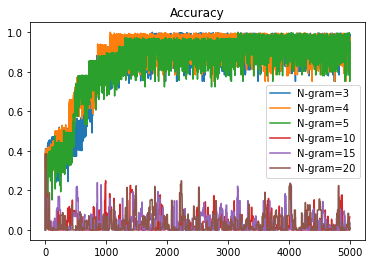

In [90]:
plt.title("Accuracy")
for key, value in accuracies_dct.items():
    plt.plot(value, label=f'N-gram={key}')
plt.legend()

Видим, что с какого-то момента увеличение размера n-грам модель перестаёт вменяемо предсказывать то, что мы от неё хотим. В целом, конечно, оно и понятно - при `N = 10` мы пытаемся захватить контекст на уровне слов (причём не одного слова, а нескольких), тут уже всплывают проблемы встречаемости комбинаций. Давайте в этом убедимся:

In [89]:
cnt_train = build_counter(train_text, n_gram=10).most_common()
cnt_train

[(' князь анд', 285),
 ('князь андр', 285),
 ('нязь андре', 285),
 ('язь андрей', 285),
 ('зь андрей ', 285),
 (' как будто', 165),
 ('как будто ', 165),
 (' сказал он', 143),
 ('сказал он ', 143),
 (' михайловн', 124),
 (' князь вас', 121),
 ('князь васи', 120),
 ('нязь васил', 120),
 ('язь васили', 120),
 ('зь василий', 120),
 ('ь василий ', 120),
 (' багратион', 109),
 (' ничего не', 107),
 (' император', 106),
 ('ничего не ', 100),
 (' остановил', 100),
 (' несколько', 97),
 ('несколько ', 97),
 (' французск', 93),
 (' неприятел', 93),
 ('чувствовал', 92),
 ('л князь ан', 89),
 (' анна миха', 86),
 ('анна михай', 86),
 ('нна михайл', 86),
 ('на михайло', 86),
 ('а михайлов', 86),
 ('михайловна', 86),
 ('ихайловна ', 86),
 (' выражение', 83),
 (' сказал кн', 78),
 ('сказал кня', 78),
 ('казал княз', 78),
 ('азал князь', 78),
 ('зал князь ', 78),
 (' человека ', 75),
 (' сказала о', 75),
 ('сказала он', 75),
 ('казала она', 74),
 ('азала она ', 74),
 (' продолжал', 74),
 (' проговори

Появляется слишком много повторений, да и токены распределены как-то не очень хорошо. Более того, такое количество n-грам не то, чтобы хорошо ложится на наш подход - за одну итерацию мы меняем местами всего 2 символа в декодировочном словаре, этого едва ли хватит, чтобы подстроиться под n-грамму размера 10 даже за несколько итераций, а мы никак не отличаем выбранные пары символов.

Лучший результат получился при `N = 3` или `N = 4` (под лучший имеется ввиду "раньше всего достигнувший 1").

## Думаем о возможных применениях

Что ж, понятно, что подобный алгоритм может подойти для расшифровки различных текстов (археологам может быть полезно, ну или даже студентам, которые с утра пытаются понять, что они конспектировали в полусонном состоянии в 3 часа ночи). Конечно же, это не идеальное решение - мы в некоторой степени полагаемся на то, что имеется некоторое соответствие букв/слогов нашего языка с тем языком, который мы хотим расшифровать. С иероглифическими языками вроде китайского, думается, такой подход бы не прокатил так просто. Впрочем, в этом случае можно попробовать токенизовать не по n-граммам букв, а по словам или по их n-граммам.